### forge(真偽數據集)
- two-class classification(2個種類的分類)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
X.shape:(26, 2)


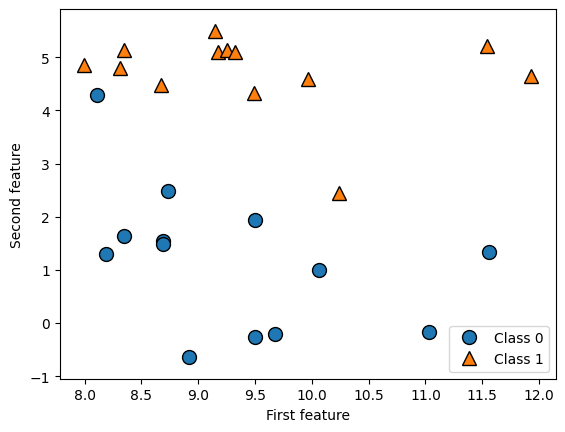

In [ ]:
## 使用mglearn產生的圖表
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()
#print(X, y)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))

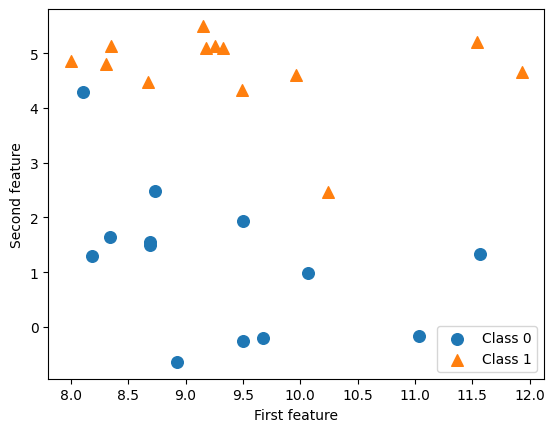

X.shape:(26, 2)


In [ ]:
## 使用matplotlib產生的圖表
import mglearn
import matplotlib.pyplot as plt
import numpy as np

# Generate the dataset
X, y = mglearn.datasets.make_forge()

# Separate data points by class
class_0_indices = np.where(y == 0)
class_1_indices = np.where(y == 1)

#print(class_0_indices)

X_class_0 = X[class_0_indices]
X_class_1 = X[class_1_indices]

# Create the scatter plot using plt.scatter
plt.scatter(X_class_0[:, 0], X_class_0[:, 1], label="Class 0", marker='o', s=70)
plt.scatter(X_class_1[:, 0], X_class_1[:, 1], label="Class 1", marker='^', s=70)

# Add labels and legend
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.legend(loc=4)  # Lower right corner

# Display the plot
plt.show()

print("X.shape:{}".format(X.shape))


## Wave
- regression 迴歸的演算法
- X:1個feature
- y:1個label

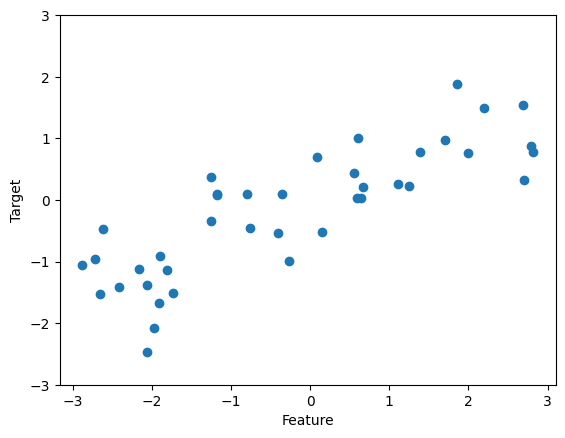

In [12]:
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

### Wisconsin Breast Cancer dataset(威斯康辛州乳癌資料集)

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [15]:
print("Shape of cancer data:{}".format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [16]:
print("Sample counts per class:\n{}".format(
    {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [17]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## california

In [19]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(f"California housing data shape: {housing.data.shape}")

California housing data shape: (20640, 8)


In [20]:
# Example of loading the Ames housing dataset:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
print(f"Ames housing data shape: {housing.data.shape}")

Ames housing data shape: (1460, 80)
